# Reproduction of the "climate strime cover from the Economist" using mean temperature of the city of Lugano(CH)

## Step 2: Read the data into a DataFrame


In [37]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('ECA_blended_custom/TG_STAID000242.txt', skiprows=19)
df.columns


Index(['SOUID', 'DATE', 'TG', 'Q_TG'], dtype='object')

## Step 3: Data Wrangling

Text(0.5, 1.0, 'Historical Temperature Data')

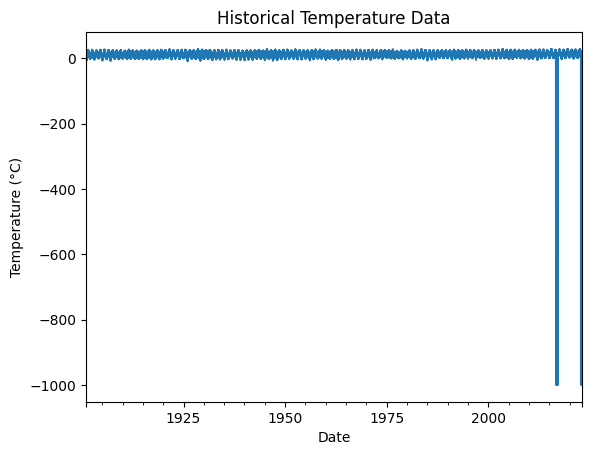

In [59]:
df['temperatures'] = df['TG']/10

df['temperatures'].plot.line()
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Historical Temperature Data')

There are some strange values. Sometimes the temperature has a value of -999

## Step 4: Time Axis

Text(0.5, 1.0, 'Historical Temperature Data')

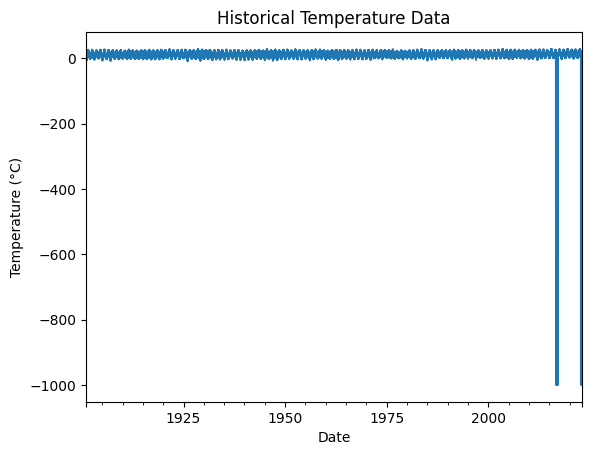

In [62]:
# Convert date column to string
df['DATE'] = df['DATE'].astype(str)
# Extract year, month and day from date column
df['year'] = df['DATE'].str[0:4]
df['month'] = df['DATE'].str[4:6]
df['day'] = df['DATE'].str[6:8]

# Create date column
df['date'] = df['year'] + '-' + df['month'] + '-' + df['day']

# Convert date column to pandas timestamp
df['date'] = pd.to_datetime(df['date'])

# Set date column as index
df.set_index('date', inplace=True)

# Plot temperature as line plot
df['temperatures'].plot.line()
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Historical Temperature Data')


## Step 5: Missing Values

In [74]:
df = df.loc[:'2022-12-31']
missing_rows = df[df['temperatures'] == -999.9]
median = df['temperatures'].median()

for index, row in missing_rows.iterrows():
    # There are some values of -999.9 in 2023 and 2022, so there won't be a year after
    if index.year == 2023 or index.year == 2022 or index.year == 1901:
        df.loc[index, 'temperatures'] = median
    else:
        df_one_year_before = df.loc[index - pd.DateOffset(years=1)]
        df_one_year_after = df.loc[index - pd.DateOffset(years=-1)]
        df.loc[index, 'temperatures'] = (df_one_year_before['temperatures'] + df_one_year_after['temperatures'])/2


#''' Interpolate() function could be used to fill the missing values using linear interpolation '''
# # Median temperature for the whole temperature column
# median = df['temperatures'].median()

# # Replace missing values with NaN
# df.replace(-999.9, np.nan, inplace=True)

# # Interpolate missing values using linear interpolation
# df['temperatures'].interpolate(limit_direction='both', inplace=True)

# # Replace remaining NaN values with median
# df.fillna(median, inplace=True)


## Step 7: Aggregate

Text(0.5, 1.0, 'Historical Temperature Data')

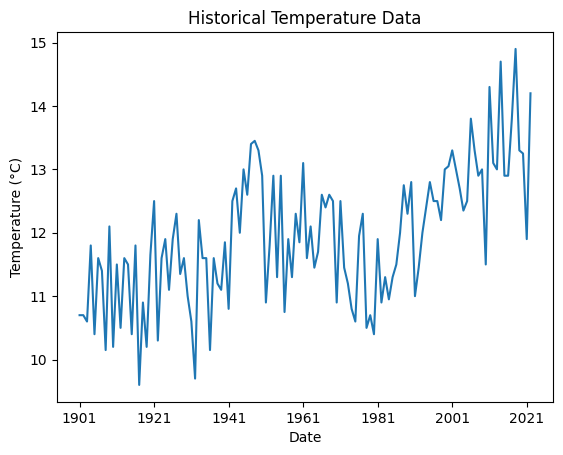

In [154]:
# Reduce the data to one value per year using the median
# yearly_median_temperatures = df.groupby('year')['temperatures'].median() 

# The same as above, but the datetime index is preserved and we'll have a multiindex
yearly_median_temperatures = df.groupby('year')['temperatures'].resample('Y').median()
yearly_median_temperatures = pd.DataFrame(yearly_median_temperatures)

# I want only one index, so I reset the index with only the year
yearly_median_temperatures = yearly_median_temperatures.reset_index('date')

# Make it a DataFrame 
yearly_median_temperatures = pd.DataFrame(yearly_median_temperatures)

#yearly_median_temperatures.index
# Plot the yearly median temperatures
yearly_median_temperatures['temperatures'].plot.line()
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Historical Temperature Data')

## Step 7: Heatmap

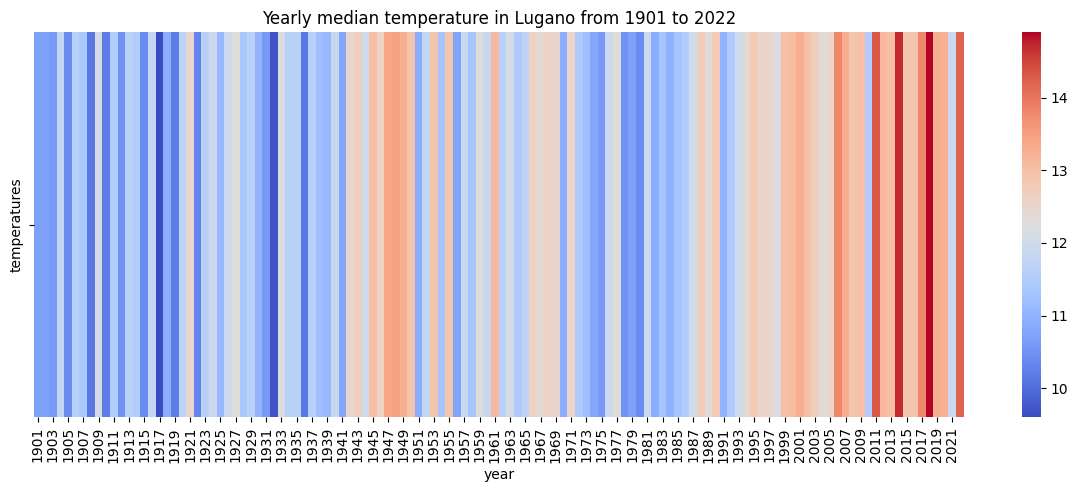

In [198]:
import seaborn as sns

cmap = plt.get_cmap('coolwarm')

# Create a new table removing the date column
pivot_df = yearly_median_temperatures['temperatures']
pivot_df = pd.DataFrame(pivot_df)

# Create a heatmap
plt.figure(figsize=(15, 5))
plt.title('Yearly median temperature in Lugano from 1901 to 2022')

# # Rolling average of 5 years heatmap
# ts = pivot_df.rolling(window=5).mean()
# print(ts.tail())
# sns.heatmap(ts, cmap='coolwarm')

# Yearly heatmap
pivot_df.transpose()
sns.heatmap(pivot_df.T, cmap='coolwarm')

plt.savefig('lugano_temperature_1901_2022_heatmap.png')
plt.show()

